# Simple Linear Regression (Hours of study)

The goal of this project was to build a linear regression model from the ground up using numpy.

In [ ]:
%matplotlib inline

#Imports
from numpy import *
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

### Import the data

Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

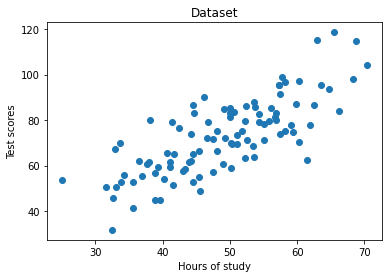

In [ ]:
#Dataset: Way 2 dont requiere have the files in your Drive folder
import numpy as np
points = np.array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
       [ 63.61556125,  95.22936602],
       [ 46.73761941,  79.05240617],
       [ 50.55676015,  83.43207142],
       [ 52.22399609,  63.35879032],
       [ 35.56783005,  41.4128853 ],
       [ 42.43647694,  76.61734128],
       [ 58.16454011,  96.76956643],
       [ 57.50444762,  74.08413012],
       [ 45.44053073,  66.58814441],
       [ 61.89622268,  77.76848242],
       [ 33.09383174,  50.71958891],
       [ 36.43600951,  62.12457082],
       [ 37.67565486,  60.81024665],
       [ 44.55560838,  52.68298337],
       [ 43.31828263,  58.56982472],
       [ 50.07314563,  82.90598149],
       [ 43.87061265,  61.4247098 ],
       [ 62.99748075, 115.2441528 ],
       [ 32.66904376,  45.57058882],
       [ 40.16689901,  54.0840548 ],
       [ 53.57507753,  87.99445276],
       [ 33.86421497,  52.72549438],
       [ 64.70713867,  93.57611869],
       [ 38.11982403,  80.16627545],
       [ 44.50253806,  65.10171157],
       [ 40.59953838,  65.56230126],
       [ 41.72067636,  65.28088692],
       [ 51.08863468,  73.43464155],
       [ 55.0780959 ,  71.13972786],
       [ 41.37772653,  79.10282968],
       [ 62.49469743,  86.52053844],
       [ 49.20388754,  84.74269781],
       [ 41.10268519,  59.35885025],
       [ 41.18201611,  61.68403752],
       [ 50.18638949,  69.84760416],
       [ 52.37844622,  86.09829121],
       [ 50.13548549,  59.10883927],
       [ 33.64470601,  69.89968164],
       [ 39.55790122,  44.86249071],
       [ 56.13038882,  85.49806778],
       [ 57.36205213,  95.53668685],
       [ 60.26921439,  70.25193442],
       [ 35.67809389,  52.72173496],
       [ 31.588117  ,  50.39267014],
       [ 53.66093226,  63.64239878],
       [ 46.68222865,  72.24725107],
       [ 43.10782022,  57.81251298],
       [ 70.34607562, 104.25710159],
       [ 44.49285588,  86.64202032],
       [ 57.5045333 ,  91.486778  ],
       [ 36.93007661,  55.23166089],
       [ 55.80573336,  79.55043668],
       [ 38.95476907,  44.84712424],
       [ 56.9012147 ,  80.20752314],
       [ 56.86890066,  83.14274979],
       [ 34.3331247 ,  55.72348926],
       [ 59.04974121,  77.63418251],
       [ 57.78822399,  99.05141484],
       [ 54.28232871,  79.12064627],
       [ 51.0887199 ,  69.58889785],
       [ 50.28283635,  69.51050331],
       [ 44.21174175,  73.68756432],
       [ 38.00548801,  61.36690454],
       [ 32.94047994,  67.17065577],
       [ 53.69163957,  85.66820315],
       [ 68.76573427, 114.85387123],
       [ 46.2309665 ,  90.12357207],
       [ 68.31936082,  97.91982104],
       [ 50.03017434,  81.53699078],
       [ 49.23976534,  72.11183247],
       [ 50.03957594,  85.23200734],
       [ 48.14985889,  66.22495789],
       [ 25.12848465,  53.45439421]])


#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

In [ ]:
#print(points)

### Defining the hyperparameters

In [ ]:
#hyperparameters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10 #Here!

### Define cost function

In [ ]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

### Define Gradient Descent functions

In [ ]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

### Run gradient_descent_runner() to get optimized parameters b and m

In [ ]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

NameError: ignored

### Plotting the cost per iterations

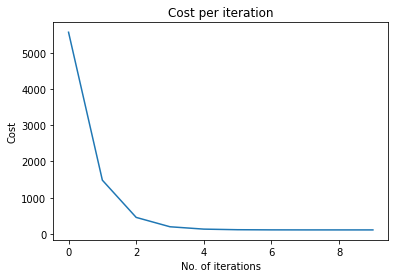

In [ ]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

### Plot line of best fit

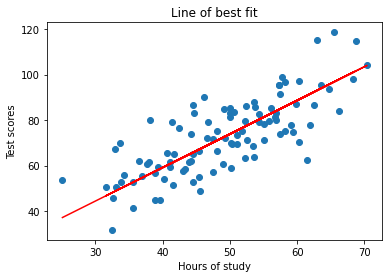

In [ ]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

# Simple Linear Regression (Charles Law)

The goal of this project was to build a linear regression model from the ground up using numpy.

In [13]:
%matplotlib inline

#Imports
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

### Import the data

Here, we're using a dataset with two columns containing the variation of temperature in Charles experiment.

| Temperature (ºC) |   0  |  10  |  20 |  30  |  40  |  50  |  60  |  70  |  80  |  90  |  100 |
|-----------------:|:----:|:----:|:---:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|   Pressure (atm) | 0.94 | 0.96 | 1.0 | 1.05 | 1.07 | 1.09 | 1.14 | 1.17 | 1.21 | 1.24 | 1.28 |

[[  0.     0.94]
 [ 10.     0.96]
 [ 20.     1.  ]
 [ 30.     1.05]
 [ 40.     1.07]
 [ 50.     1.09]
 [ 60.     1.14]
 [ 70.     1.17]
 [ 80.     1.21]
 [ 90.     1.24]
 [100.     1.28]]


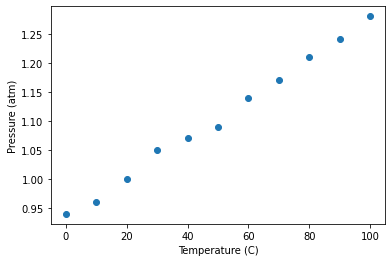

In [30]:
#Dataset
points = np.array([[0,0.94],[10,0.96],[20,1],[30,1.05],[40,1.07],[50,1.09],[60,1.14],[70,1.17],[80,1.21],[90,1.24],[100,1.28]])
print(points)

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

plt.scatter(x,y)
#plt.title('Line of best fit')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (atm)')
plt.show()

### Defining coefficents a1, a0

In [ ]:
def coefs(points):
  
  x = array(points[:,0])
  y = array(points[:,1])

  sum_xi = 0
  for xi in x:
    #print(xi)
    sum_xi = sum_xi + xi
  #print(sum_xi)
  #return sum_xi

  sum_yi = 0
  for yi in y:
    #print(yi)
    sum_yi = sum_yi + yi
  #print(sum_yi)
  #return sum_yi

  sum_xiyi = 0
  for xi, yi in points:
    xiyi = xi*yi
    #print(xiyi)
    sum_xiyi = sum_xiyi + xiyi
    #print(sum_xiyi)
  #return sum_xiyi

  sumpow2_xi  = 0
  for xi in x:
    #print(xi)
    sumpow2_xi  = sumpow2_xi + (xi**2)
  #print(sumpow2_xi)
  #return sumpow2_xi

  print("y = a1*x+a0")
  a1 = ((len(points))*(sum_xiyi)-(sum_xi)*(sum_yi))/((len(points))*(sumpow2_xi)-(sum_xi**2))
  print("a1 = ", a1)
  a0 = (sum_yi/len(points)) - (a1*(sum_xi/len(points)))
  print("a0 = ", a0)
  return a1, a0

In [ ]:
a1, a0 = coefs(points)
T = x
p = a1*T + a0 # p is predicted pressure for x temperatures (T)

y = a1*x+a0
a1 =  0.003418181818181829
a0 =  0.933636363636363


### Plot line of best fit

In [ ]:
plt.scatter(x,y)
#plt.title('Line of best fit')
plt.plot(T,p, color='red', linewidth=3)
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (atm)')
plt.show()

NameError: ignored

### Plot line of absolute T

In [ ]:
T_abs = -a0/a1
print(T_abs)

-273.1382978723394


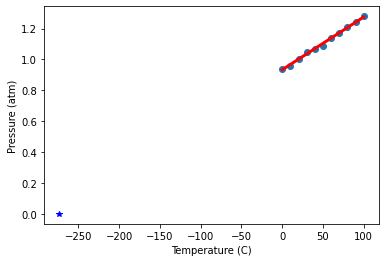

In [ ]:
plt.scatter(x,y)
#plt.title('Line of best fit')
plt.plot(T_abs,0, 'b*')
plt.plot(T,p, color='red', linewidth=3)
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (atm)')
plt.show()